## Distinguish high quality signals from low quality ones

### Import libraries

In [3]:
# Imports
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import sys
from matplotlib import gridspec
import random

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *

### Load catalog of moonquakes

In [ ]:
mqdir = '../catalogs/quality_control/'
cat = pd.read_csv(mqdir + 'A17_moonquakes_catalog_nodupes.csv')
cat.drop(list(cat.filter(regex='Unnamed|index')), axis=1, inplace=True)

### Identify events that meet the quality criteria

In [5]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = 3
maxfreq = 35
befwin = 60
aftwin = 60

qualities = []
for r in np.arange(0,len(cat)):
    
    # Obtain RMSE
    row = cat.iloc[r]
    arrtime = datetime.strptime(row.picktime,'%Y-%m-%d %H:%M:%S.%f')
    geonum = row.geophone
    evid = row.evid
    quotient = row.SNR_div_RMSE
    gap_len = row.max_gap_len_s
    if (quotient >= 12) & (quotient < 10000):
        if gap_len < 5:
            quality = 'HQ'
        else:
            quality = 'LQ'
    else:
        quality = 'LQ'
    qualities.append(quality)

In [6]:
cat['quality'] = qualities
cat.to_csv(mqdir + 'A17_moonquakes_catalog_nodupes.csv')

### Plot a pie chart of high vs low quality detections

In [7]:
num_hq = len(cat.loc[cat.quality == 'HQ'])
num_lq = len(cat.loc[cat.quality == 'LQ'])
num_hq

25675

In [8]:
num_lq

20923

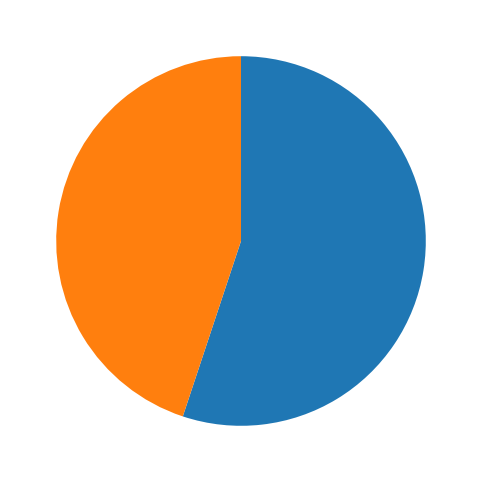

In [9]:
mq_nums = [num_hq, num_lq]

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(9, 6))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)

### Assign grades to each moonquake

- Grade AA - 4 seismic detections
- Grade BB - 3 seismic detections
- Grade CC - 2 seismic detections
- Grade DD - 1 seismic detection
- Grade EE - 0 seismic detection

In [10]:
grades_new = []
for r in np.arange(0,len(cat)):
    row = cat.iloc[r]
    evid = row.evid
    # Obtain # of high quality rows for this event ID
    hq_rows = cat.loc[(cat.evid == evid) & (cat.quality == 'HQ')]
    if len(hq_rows) > 4:
        print('flag')
    
    if len(hq_rows) == 4:
        grades_new.append('AA')
    elif len(hq_rows) == 3:
        grades_new.append('BB')
    elif len(hq_rows) == 2:
        grades_new.append('CC')
    elif len(hq_rows) == 1:
        grades_new.append('DD')
    else:
        grades_new.append('EE')
#
cat['grade_new'] = grades_new
cat.to_csv(mqdir + 'A17_moonquakes_catalog_nodupes.csv')

In [13]:
cat_aa = cat.loc[cat.grade_new == 'AA']
len(np.unique(cat_aa.evid.tolist()))

4875

In [14]:
cat_bb = cat.loc[cat.grade_new == 'BB']
len(np.unique(cat_bb.evid.tolist()))

1004

In [15]:
cat_cc = cat.loc[cat.grade_new == 'CC']
len(np.unique(cat_cc.evid.tolist()))

941

In [16]:
cat_dd = cat.loc[cat.grade_new == 'DD']
len(np.unique(cat_dd.evid.tolist()))

1281

In [17]:
cat_ee = cat.loc[cat.grade_new == 'EE']
len(np.unique(cat_ee.evid.tolist()))

3690

In [18]:
len(np.unique(cat.evid.tolist())) - len(np.unique(cat_ee.evid.tolist()))

8101

### Separately save high-quality detections

In [19]:
cat_hq = cat.loc[cat.quality == 'HQ']
cat_hq = cat_hq.reset_index()
cat_hq.drop(list(cat_hq.filter(regex='Unnamed|index')), axis=1, inplace=True)
cat_hq.to_csv(mqdir + 'A17_moonquakes_catalog_nodupes_HQ.csv')